In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

Oss_path="/content/OsservazioniDoe"
path_finale="/content/sample_data/CsvFinale.csv"
path_medie="/content/sample_data/CsvTmpMedie.csv"
path_finale1="/content/sample_data/CsvFinale1.csv"

In [ ]:
class FileCsv:
    def __init__(self):
        self.percorsi_file = []
        self.employee_dict=[]
        self.ctt=["75% usable","25% usable"]
        #self.ctt=["3000","9000"]
        self.i=0
        self.y=0
        self.pgsize=["Small","Medium-Low","Medium-Hight","Large"]
        #self.pgsize=["Small","Medium-Low","Medium-Hight","Large"]
        self.i1=0
        self.y1=0


    def aggiungi_percorso_file(self, percorso):
        self.percorsi_file.append(percorso)


    def elabora_file(self):
        for file_path in self.percorsi_file:
           # print(f"file_path '{file_path}'")
            df = pd.read_csv(file_path)

            filtered_df = df.loc[df['responseMessage'] == "OK"]

            #calcolo duration
            TimeStapMax = filtered_df['timeStamp'].max()
            TimeStapMin = filtered_df['timeStamp'].min()
            Duration=(TimeStapMax-TimeStapMin)/1000
            NumRighe = filtered_df.shape[0]
            #calcolo Response Time
            #valuto COV
            ResponseTime = None
            COV = filtered_df['elapsed'].std()/filtered_df['elapsed'].mean()
            if COV < 0.5:
                #prendo la media
                ResponseTime = filtered_df['elapsed'].mean()
            elif COV >= 0.5  :
                ResponseTime = filtered_df['elapsed'].median()

            self.employee_dict.append([self.ctt[self.i],self.pgsize[self.i1],ResponseTime])
            self.y=self.y+1;
            if self.y>=20:
              self.i=self.i+1;
              self.y=0
            self.y1=self.y1+1;
            if self.y1>=5:
              self.i1=self.i1+1;
              if self.i1>=4:
                 self.i1=0

              self.y1=0
        df = pd.DataFrame(self.employee_dict, columns =['Request Rate','Page Size','ResponseTime'])
        df.to_csv(path_finale, index=False, sep=",")
        #print(df)








In [ ]:
class CalcolaDOE:
   def __init__(self):
        self.percorsi_file = []
        self.employee_dict=[]
        self.ctt=["75% usable","25% usable"]
        self.i=0
        self.y=0
        self.pgsize=["Small","Medium-Low","Medium-Hight","Large"]
        self.i1=0
        self.y1=0
        self.Media=0
        self.Somma=0
        self.Residui=0

   def CalcolaResidui(self):
         dfMedia = pd.read_csv(path_finale)
         #print(df)
         for self.i, valore in enumerate(self.ctt):
            for self.i1, valore in enumerate(self.pgsize):
                filtered_df = (dfMedia.loc[dfMedia['Request Rate']==self.ctt[self.i]])
                filtered_df = (filtered_df.loc[filtered_df['Page Size']==self.pgsize[self.i1]])
                #print(filtered_df)
                self.Media= (filtered_df['ResponseTime'].astype(float).mean())
                self.employee_dict.append([self.ctt[self.i],self.pgsize[self.i1],self.Media])
                #print( self.employee_dict)
         dfMedia = pd.DataFrame(self.employee_dict, columns =['Request Rate','Page Size','Media'])
         dfMedia.to_csv(path_medie, index=False, sep=",")
         #print(dfMedia)

         df = pd.read_csv(path_finale)
         dfMedia = pd.read_csv(path_medie)
         #print(dfResidui)
         self.employee_dict.clear()

         self.i=0
         self.i1=0
         for self.i, valore in enumerate(self.ctt):
                    for self.i1, valore in enumerate(self.pgsize):
                        filtered_df = (df.loc[df['Request Rate']==self.ctt[self.i]])
                        filtered_df = (filtered_df.loc[filtered_df['Page Size']==self.pgsize[self.i1]])

                        filtered_dfMedia = (dfMedia.loc[dfMedia['Request Rate']==self.ctt[self.i]])
                        filtered_dfMedia = (filtered_dfMedia.loc[filtered_dfMedia['Page Size']==self.pgsize[self.i1]])
                        for Media in filtered_dfMedia['Media']:
                            for RespTime in filtered_df['ResponseTime']:
                                self.Residui=RespTime - Media
                                self.employee_dict.append([self.ctt[self.i],self.pgsize[self.i1],RespTime,self.Residui])


         df = pd.DataFrame(self.employee_dict, columns =['Request Rate','Page Size','ResponseTime','Residuo'])
         df.to_csv(path_finale1, index=False, sep=",")
         #print(df)

   def TestNormalità(self):
        dfFinale = pd.read_csv(path_finale1)
        ax = pg.qqplot( dfFinale['Residuo'], dist='norm')















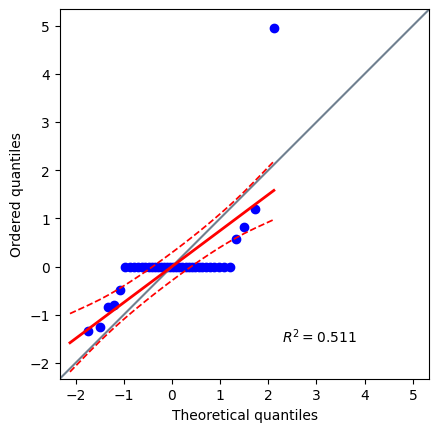

In [127]:
# Programma principale
if __name__ == "__main__":


    # Cancella il file
    if os.path.exists(path_finale) or os.path.exists(path_finale1) or os.path.exists(path_medie) :
      os.remove(path_finale)
      os.remove(path_finale1)
      os.remove(path_medie)
    CsvFile = FileCsv()
    DOE=CalcolaDOE()
    # Ottieni un elenco di tutti i file nella cartella
    elenco_file = os.listdir(Oss_path)
    #ordino file csv nella cartella

    elenco_file_ordinato = sorted(elenco_file)


    # Itera attraverso i file nella cartella
    for nome_file in elenco_file_ordinato:
        # Crea il percorso completo del file
        percorso_completo = os.path.join(Oss_path, nome_file)
        CsvFile.aggiungi_percorso_file(percorso_completo)
        #print(percorso_completo)


    CsvFile.elabora_file()
    DOE.CalcolaResidui()
    DOE.TestNormalità()





